# Index:
I [Import necessary packages & files](#first-bullet)

II [Understanding the problem](#second-bullet)

III [EDA](#third-bullet)

    A. Looking at size of data
    
    B. Properties of the target variable
    
    C. Properties of the features: Finding some peculirarities and dependencies between features and target variable
    
    D. Generate ideas for feature engineering and future hypothesis

# I. Importing necessary packages & files

#### A. Importing packages

In [175]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np

#### B. Importing files

In [176]:
train_dataset = pd.read_csv("E://Jupyter//Kaggle//3.learn-together//data//train.csv")
test_dataset = pd.read_csv("E://Jupyter//Kaggle//3.learn-together//data//test.csv")

In [177]:
train_dataset.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...      Soil_Type32  \
0            221             232            148     ...                0   
1            220             235            151     ...                0   
2            234             238            135     ...                0   
3            238             238            122     ...                0   
4            220             234            150     ...                0   

   Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type38  Soil_Type39  Soil_Type40  Cover_Type  
0            0            0            0           5  
1            0            0            0           5  
2            0            0            0           2  
3            0            0            0           2  
4            0            0            0           5  

[5 rows x 56 columns]

# II. Understand the problem

Data Type: Tabluar data

Problem Type: Classification

Competition Metric: Categorization Accuracy, percentage of correct predictions

In [178]:
def evaluate_metric_score(y_true, y_pred):
    if y_true.shape[0] != y_pred.shape[0]:
        raise Exception("Sizes do not match")
        return 0
    else:
        size = y_true.shape[0]
        matches = 0
        y_true_array = np.array(list(y_true))
        y_pred_array = np.array(list(y_pred))
        for i in range(0,size):
            if y_true_array[i]==y_pred_array[i]:
                matches = matches + 1
        return matches/size

# III. Initial EDA

Goals of EDA:
* Size of the data
* Properties of the target variable (check for issues like high class imbalance, skewed distribution in a regression)
* Properties of the features: Finding some peculirarities and dependencies between features and target variable is always useful
* Generate ideas for feature engineering and future hypothesis

## A. Size of the data

In [179]:
train_dataset.shape

(15120, 56)

In [180]:
test_dataset.shape

(565892, 55)

In [181]:
X = train_dataset.copy()
X = X.drop(columns=['Cover_Type'])
y = train_dataset[['Cover_Type']]

In [182]:
X.head()

Id  Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0   1       2596      51      3                               258   
1   2       2590      56      2                               212   
2   3       2804     139      9                               268   
3   4       2785     155     18                               242   
4   5       2595      45      2                               153   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm     ...       Soil_Type31  \
0            221             232            148     ...                 0   
1            220             235            151     ...                 0   
2            234             238            135     ...                 0   
3            238             238            122     ...                 0   
4            220             234            150     ...                 0   

   Soil_Type32  Soil_Type33  Soil_Type34  Soil_Type35  Soil_Type36  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            0            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   Soil_Type37  Soil_Type38  Soil_Type39  Soil_Type40  
0            0            0            0            0  
1            0            0            0            0  
2            0            0            0            0  
3            0            0            0            0  
4            0            0            0            0  

[5 rows x 55 columns]

In [183]:
X.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

In [184]:
train_dataset.describe()

Id     Elevation        Aspect         Slope  \
count  15120.00000  15120.000000  15120.000000  15120.000000   
mean    7560.50000   2749.322553    156.676653     16.501587   
std     4364.91237    417.678187    110.085801      8.453927   
min        1.00000   1863.000000      0.000000      0.000000   
25%     3780.75000   2376.000000     65.000000     10.000000   
50%     7560.50000   2752.000000    126.000000     15.000000   
75%    11340.25000   3104.000000    261.000000     22.000000   
max    15120.00000   3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm      ...        Soil_Type32   Soil_Type33   Soil_Type34  \
count   15120.000000      ...       15120.000000  15120.000000  15120.000000   
mean      135.091997      ...           0.045635      0.040741      0.001455   
std        45.895189      ...           0.208699      0.197696      0.038118   
min         0.000000      ...           0.000000      0.000000      0.000000   
25%       106.000000      ...           0.000000      0.000000      0.000000   
50%       138.000000      ...           0.000000      0.000000      0.000000   
75%       167.000000      ...           0.000000      0.000000      0.000000   
max       248.000000      ...           1.000000      1.000000      1.000000   

        Soil_Type35   Soil_Type36   Soil_Type37   Soil_Type38   Soil_Type39  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.006746      0.000661      0.002249      0.048148      0.043452   
std        0.081859      0.025710      0.047368      0.214086      0.203880   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  
mean       0.030357      4.000000  
std        0.171574      2.000066  
min        0.000000      1.000000  
25%        0.000000      2.000000  
50%        0.000000      4.000000  
75%        0.000000      6.000000  
max        1.000000      7.000000  

[8 rows x 56 columns]

In [185]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
Id                                    15120 non-null int64
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_T

In [186]:
test_dataset.describe()

Id      Elevation         Aspect          Slope  \
count  565892.000000  565892.000000  565892.000000  565892.000000   
mean   298066.500000    2964.977407     155.629558      14.039635   
std    163359.093603     273.157030     111.962120       7.450155   
min     15121.000000    1859.000000       0.000000       0.000000   
25%    156593.750000    2818.000000      58.000000       9.000000   
50%    298066.500000    2999.000000     127.000000      13.000000   
75%    439539.250000    3164.000000     260.000000      18.000000   
max    581012.000000    3858.000000     360.000000      66.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                     565892.000000                   565892.000000   
mean                         270.556622                       46.294408   
std                          212.500153                       58.209469   
min                            0.000000                     -173.000000   
25%                          108.000000                        7.000000   
50%                          228.000000                       29.000000   
75%                          390.000000                       69.000000   
max                         1397.000000                      601.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                    565892.000000  565892.000000   565892.000000   
mean                       2367.143116     212.131133      223.435026   
std                        1561.482002      26.661063       19.668053   
min                           0.000000       0.000000        0.000000   
25%                        1116.000000     198.000000      213.000000   
50%                        2018.000000     218.000000      226.000000   
75%                        3349.000000     231.000000      237.000000   
max                        7117.000000     254.000000      254.000000   

       Hillshade_3pm      ...          Soil_Type31    Soil_Type32  \
count  565892.000000      ...        565892.000000  565892.000000   
mean      142.726951      ...             0.044768       0.091588   
std        38.030094      ...             0.206795       0.288444   
min         0.000000      ...             0.000000       0.000000   
25%       119.000000      ...             0.000000       0.000000   
50%       143.000000      ...             0.000000       0.000000   
75%       168.000000      ...             0.000000       0.000000   
max       254.000000      ...             1.000000       1.000000   

         Soil_Type33    Soil_Type34    Soil_Type35    Soil_Type36  \
count  565892.000000  565892.000000  565892.000000  565892.000000   
mean        0.078704       0.002808       0.003161       0.000193   
std         0.269277       0.052916       0.056137       0.013877   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

         Soil_Type37    Soil_Type38    Soil_Type39    Soil_Type40  
count  565892.000000  565892.000000  565892.000000  565892.000000  
mean        0.000467       0.026233       0.023236       0.014651  
std         0.021594       0.159827       0.150652       0.120152  
min         0.000000       0.000000       0.000000       0.000000  
25%         0.000000       0.000000       0.000000       0.000000  
50%         0.000000       0.000000       0.000000       0.000000  
75%         0.000000       0.000000       0.000000       0.000000  
max         1.000000       1.000000       1.000000       1.000000  

[8 rows x 55 columns]

In [187]:
test_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565892 entries, 0 to 565891
Data columns (total 55 columns):
Id                                    565892 non-null int64
Elevation                             565892 non-null int64
Aspect                                565892 non-null int64
Slope                                 565892 non-null int64
Horizontal_Distance_To_Hydrology      565892 non-null int64
Vertical_Distance_To_Hydrology        565892 non-null int64
Horizontal_Distance_To_Roadways       565892 non-null int64
Hillshade_9am                         565892 non-null int64
Hillshade_Noon                        565892 non-null int64
Hillshade_3pm                         565892 non-null int64
Horizontal_Distance_To_Fire_Points    565892 non-null int64
Wilderness_Area1                      565892 non-null int64
Wilderness_Area2                      565892 non-null int64
Wilderness_Area3                      565892 non-null int64
Wilderness_Area4                      565892 non-

.describe() & .info() gave the constant count at 15120 (train dataset) and 565892 (test dataset) across all columns
Thus no null values

## B. Properties of target variable

In [188]:
y['Cover_Type'].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

#### => There is an equal class distribution

## C. Properties of features

Start with general understanding of features
1. Categorical
2. Continuous
3. Categorical v/s Continuous

Checking 'Id' Column whether it is unique with entries

In [189]:
len(X['Id'].unique()) == len(X)

True

#### Based on description: 

#### Below columns seem to have continuous numeric data 
'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points'


#### Below columns seem to have categorical data 
Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

In [190]:
#List of continuous numeric data
list_contfeatures=['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm','Horizontal_Distance_To_Fire_Points']

In [191]:
len(list_contfeatures)

10

In [192]:
check = train_dataset.copy()
check_test = test_dataset.copy()

In [193]:
#Setting values to string type
check['Cover_Type']=check['Cover_Type'].astype(str)

#### Looking at how these features are distributed & how these vary with Cover Type (using Boxplot)

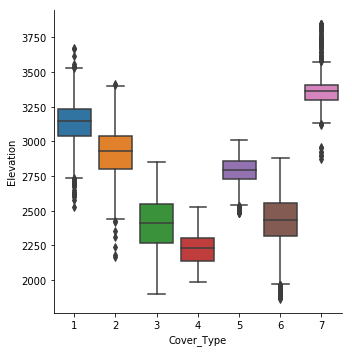

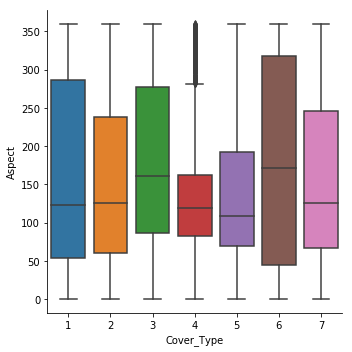

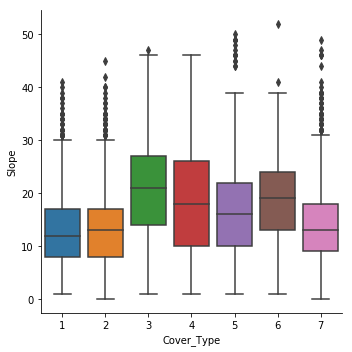

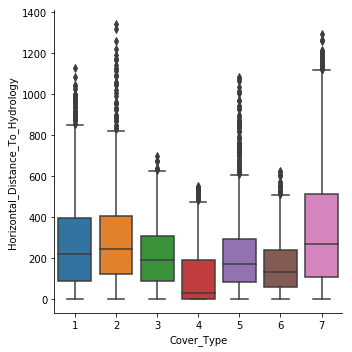

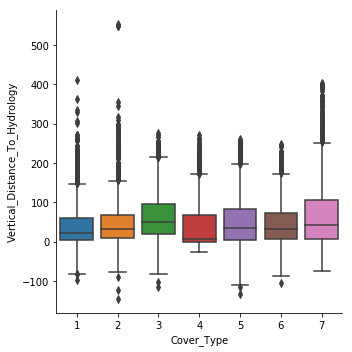

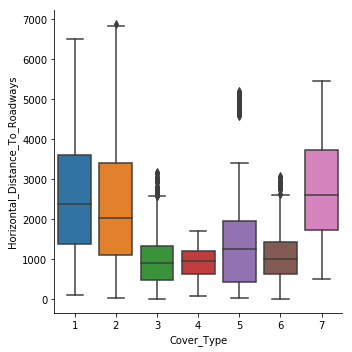

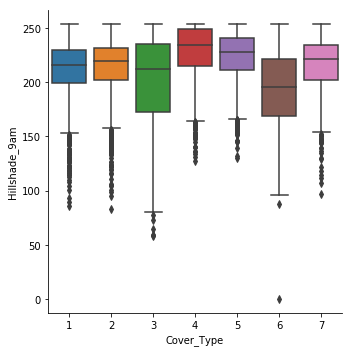

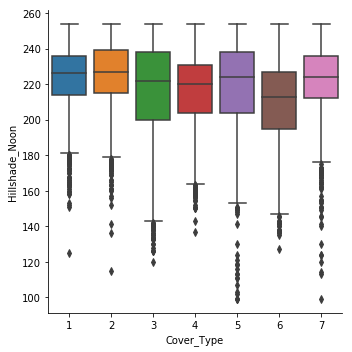

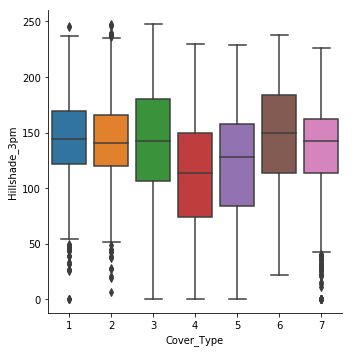

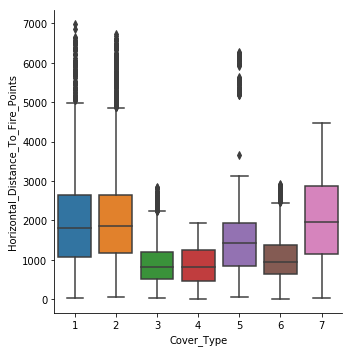

In [194]:
for col in list_contfeatures:
    sns.catplot(x='Cover_Type',y=col,data=check,kind='box')

#### Creating a new column to compress one-hot encoded features in wilderness area for visualization purposes
We know every observation corresponds to 30mx30m patch. We are now checking whether each 30mx30m has unique:
1. Cover_Type 
2. Wilderness_Area
3. Soil_Type

We know that for 1. Cover_Type, this column contains an integer value thus every 30x30 patch is mapped to a cover type
But for Wilderness Area  we are unsure as these are one-hot encoded. 
These being binary values, we will sum it across the different values

Checking Hypothesis for 2. Wilderness_area in training & testdata just to be sure

In [195]:
list_feat_wildarea=[]
str1 = "Wilderness_Area"
for i in range(1,5):
    str2=str1+str(i)
    list_feat_wildarea.append(str2)
check['Wilderness_Area_sum']=check[list_feat_wildarea].sum(axis=1)
check_test['Wilderness_Area_sum']=check_test[list_feat_wildarea].sum(axis=1)

In [196]:
#Checking in train data whether it contains only 1 unique value and it should be 1
check['Wilderness_Area_sum'].unique()

array([1], dtype=int64)

In [197]:
#Checking in test data whether it contains only 1 unique value and it should be 1
check_test['Wilderness_Area_sum'].unique()

array([1], dtype=int64)

#### => Confirmed every 30mx30m belongs to only one Wildereness_Area
Now next to Soil_Type

In [198]:
list_feat_soiltype=[]
str1 = "Soil_Type"
for i in range(1,41):
    str2=str1+str(i)
    list_feat_soiltype.append(str2)
check['Soil_Type_sum']=check[list_feat_soiltype].sum(axis=1)
check_test['Soil_Type_sum']=check_test[list_feat_soiltype].sum(axis=1)

In [199]:
#Checking in train data whether it contains only 1 unique value and it should be 1
check['Soil_Type_sum'].unique()

array([1], dtype=int64)

In [200]:
#Checking in test data whether it contains only 1 unique value and it should be 1
check_test['Soil_Type_sum'].unique()

array([1], dtype=int64)

#### => Confirmed every 30mx30m contains only one Soil Type

Lets create 2 columns for:
    1. 4 feature columns corresponding to Wilderness Areas (naming it 'Wilderness_Area')
    2. 40 feature columns corresponding to Soil Types (naming it 'Soil_Type')
=> In essence we have to analyze these categorical features (compressing 44 cols to 2 cols).This will prove useful when for EDA purposes
However for model building we preserve the one-hot encoded features

In [201]:
str1="Wilderness_Area"
for i in range(1,5):
    str2=str1+str(i)
    check.loc[(check[str2]==1),str1]=str2
    check_test.loc[(check_test[str2]==1),str1]=str2

In [202]:
#Lets check the uniqueness - should have only 4 categories
check['Wilderness_Area'].unique()

array(['Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Wilderness_Area2'], dtype=object)

In [203]:
check_test['Wilderness_Area'].unique()

array(['Wilderness_Area1', 'Wilderness_Area3', 'Wilderness_Area4',
       'Wilderness_Area2'], dtype=object)

In [204]:
str1="Soil_Type"
not_present =[]
for i in range(1,41):
    str2=str1+str(i)
    check.loc[(check[str2]==1),str1] = str2
    if len(check.loc[(check[str2]==1),str1]) ==0:
        not_present.append(str2)
    check_test.loc[(check_test[str2]==1),str1]=str2

In [205]:
check['Soil_Type'].unique()

array(['Soil_Type29', 'Soil_Type12', 'Soil_Type30', 'Soil_Type18',
       'Soil_Type16', 'Soil_Type20', 'Soil_Type24', 'Soil_Type23',
       'Soil_Type40', 'Soil_Type19', 'Soil_Type8', 'Soil_Type22',
       'Soil_Type39', 'Soil_Type9', 'Soil_Type38', 'Soil_Type33',
       'Soil_Type31', 'Soil_Type32', 'Soil_Type11', 'Soil_Type10',
       'Soil_Type5', 'Soil_Type28', 'Soil_Type4', 'Soil_Type1',
       'Soil_Type13', 'Soil_Type2', 'Soil_Type17', 'Soil_Type3',
       'Soil_Type34', 'Soil_Type6', 'Soil_Type14', 'Soil_Type37',
       'Soil_Type35', 'Soil_Type36', 'Soil_Type21', 'Soil_Type26',
       'Soil_Type27', 'Soil_Type25'], dtype=object)

In [206]:
not_present

['Soil_Type7', 'Soil_Type15']

#### => Soil types 7 & 15 are absent in train dataset

In [207]:
len(check_test['Soil_Type'].unique())==40

True

### Now lets analyze the relationship of numerical & categorical features
Just to recap for our EDA, we have:

A. 3 categorical variables: 2 features detailing 
    1. Wilderness_Area & 
    2. Soil_Type 
    3. and (1 Target feature:) Cover_Type
B. 10 numerical variables (all of which are features currently):
    1. 'Elevation',
    2. 'Aspect', 
    3. 'Slope', 
    4. 'Horizontal_Distance_To_Hydrology', 
    5. 'Vertical_Distance_To_Hydrology', 
    6. 'Horizontal_Distance_To_Roadways', 
    7. 'Hillshade_9am', 
    8. 'Hillshade_Noon', 
    9. 'Hillshade_3pm',
    10. 'Horizontal_Distance_To_Fire_Points'

### 1. Only on Categorical Features (Categorical v/s Categorical)

#### 1.A.  Wilderness Area(Countplot)

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

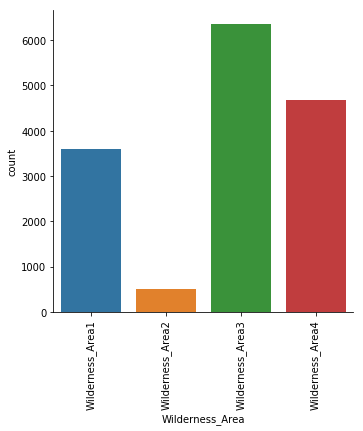

In [208]:
sns.catplot(x='Wilderness_Area',data=check,kind='count',order=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])
plt.xticks(rotation=90)

#### => Wilderness Area 3 has higher number of number of observations compared to Wilderness Area 2

#### 1.B.  Soil Type (Countplot)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]), <a list of 38 Text xticklabel objects>)

<Figure size 3600x720 with 0 Axes>

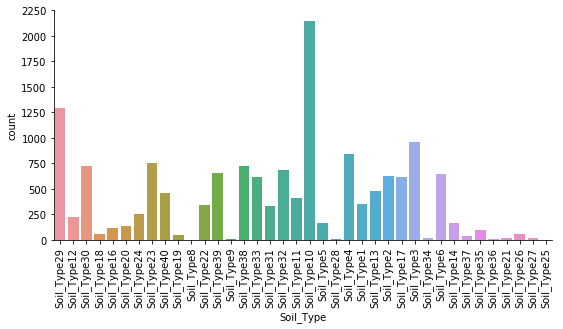

In [209]:
plt.figure(figsize=(50,10))
g= sns.catplot(x='Soil_Type',data=check,kind='count',height=4,aspect=2)
plt.xticks(rotation=90)

Understanding the distribution of points within these numerical features wrt cover type

#### 2.A. Cover Type v/s Numerical Features (for different Wilderness_Areas) Histogram

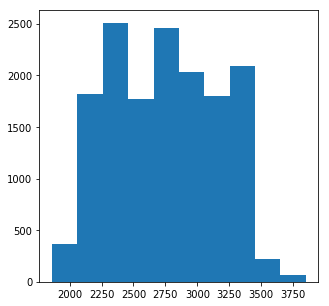

In [210]:
fig,ax = plt.subplots()
ax.hist(check['Elevation'])
fig.set_size_inches([5,5])
plt.show()

### 2. Continuous Features

#### 2.A. Histograms

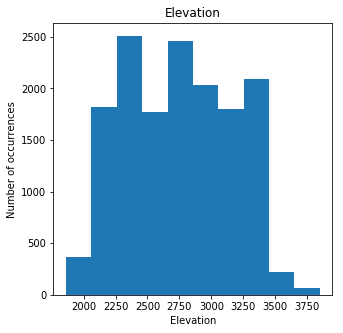

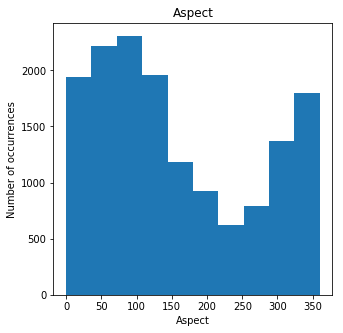

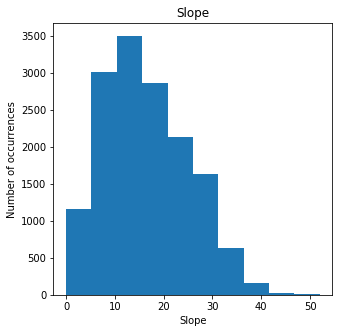

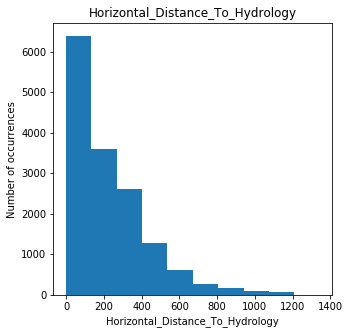

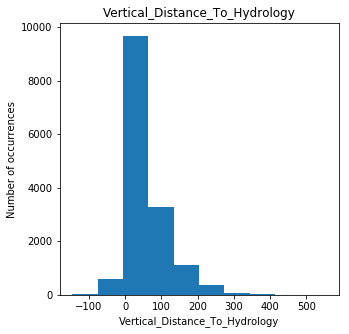

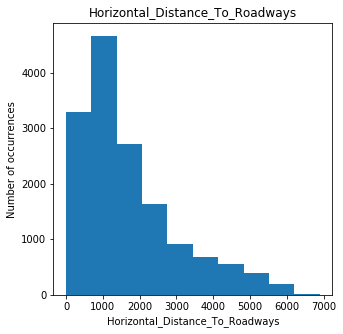

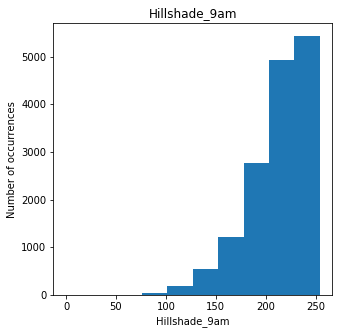

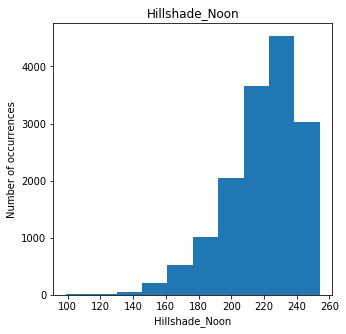

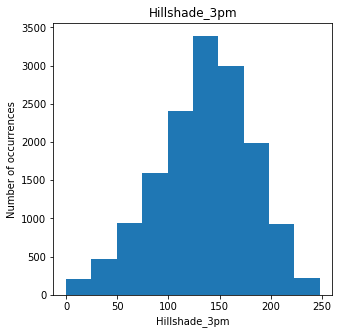

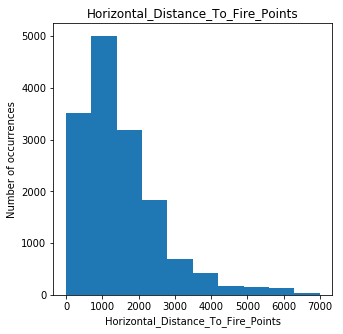

In [211]:
for col in list_contfeatures:
    fig,ax=plt.subplots()
    ax.hist(check[col])
    ax.set_title(col)
    ax.set_xlabel(col)
    ax.set_ylabel("Number of occurrences")
    fig.set_size_inches([5,5])
    plt.show()

#### These observations are majorly within the range of 2000 - 3500 meters elevation

#### 2.B. Calculation of Correlation values

In [212]:
check[list_contfeatures].corr()

Elevation    Aspect     Slope  \
Elevation                            1.000000 -0.011096 -0.312640   
Aspect                              -0.011096  1.000000  0.028148   
Slope                               -0.312640  0.028148  1.000000   
Horizontal_Distance_To_Hydrology     0.412712  0.040732 -0.055976   
Vertical_Distance_To_Hydrology       0.122092  0.056412  0.265314   
Horizontal_Distance_To_Roadways      0.578659  0.066184 -0.277049   
Hillshade_9am                        0.097900 -0.593997 -0.200072   
Hillshade_Noon                       0.215782  0.324912 -0.612613   
Hillshade_3pm                        0.089518  0.635022 -0.326887   
Horizontal_Distance_To_Fire_Points   0.443563 -0.052169 -0.239527   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                                                      0.040732   
Slope                                                      -0.055976   
Horizontal_Distance_To_Hydrology                            1.000000   
Vertical_Distance_To_Hydrology                              0.652142   
Horizontal_Distance_To_Roadways                             0.203397   
Hillshade_9am                                              -0.033803   
Hillshade_Noon                                              0.080047   
Hillshade_3pm                                               0.080833   
Horizontal_Distance_To_Fire_Points                          0.158817   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                 0.122092   
Aspect                                                    0.056412   
Slope                                                     0.265314   
Horizontal_Distance_To_Hydrology                          0.652142   
Vertical_Distance_To_Hydrology                            1.000000   
Horizontal_Distance_To_Roadways                           0.011555   
Hillshade_9am                                            -0.095930   
Hillshade_Noon                                           -0.132948   
Hillshade_3pm                                            -0.035559   
Horizontal_Distance_To_Fire_Points                       -0.015048   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.578659   
Aspect                                                     0.066184   
Slope                                                     -0.277049   
Horizontal_Distance_To_Hydrology                           0.203397   
Vertical_Distance_To_Hydrology                             0.011555   
Horizontal_Distance_To_Roadways                            1.000000   
Hillshade_9am                                             -0.003398   
Hillshade_Noon                                             0.240684   
Hillshade_3pm                                              0.173882   
Horizontal_Distance_To_Fire_Points                         0.486386   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation                                0.097900        0.215782   
Aspect                                  -0.593997        0.324912   
Slope                                   -0.200072       -0.612613   
Horizontal_Distance_To_Hydrology        -0.033803        0.080047   
Vertical_Distance_To_Hydrology          -0.095930       -0.132948   
Horizontal_Distance_To_Roadways         -0.003398        0.240684   
Hillshade_9am                            1.000000       -0.013712   
Hillshade_Noon                          -0.013712        1.000000   
Hillshade_3pm                           -0.779965        0.614526   
Horizontal_Distance_To_Fire_Points       0.078144        0.122098   

                                    Hillshade_3pm  \
Elevation                                0.089518   
Aspect                                   0.635022   
Slope      

In [213]:
check_corr=check[list_contfeatures].corr().abs()

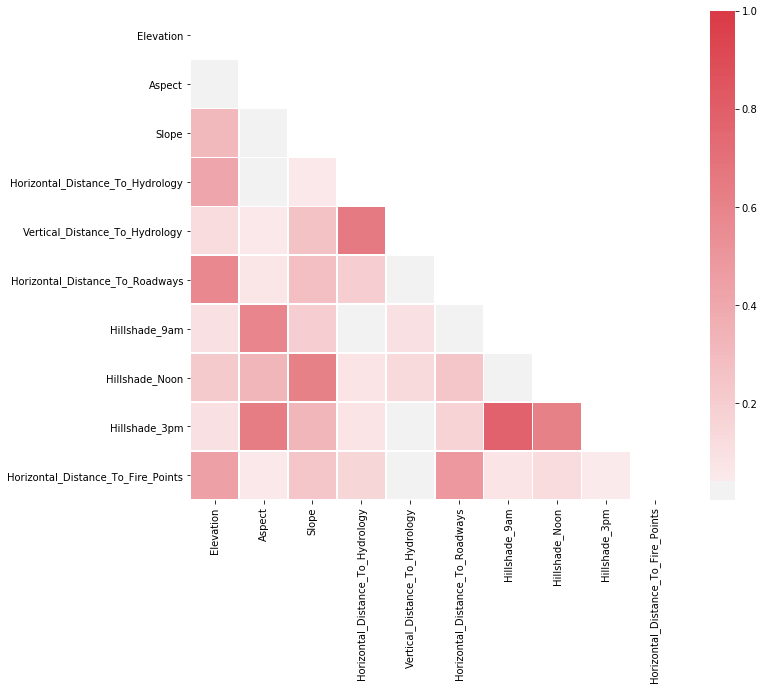

In [214]:
# Generate a mask for the upper triangle
mask = np.zeros_like(check_corr, dtype=np.bool)
# To extract values corresponding to upper(u) triangle(tri) of mask use np.triu_indices_from
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(check_corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5)

#### 2.C. Scatter plots

I dont think it will be useful to create scatter plots blindly. 
Here we had 10 numerical features
So this would account for 10C2 (45) plots
So lets take hint from correlation metrics

In [215]:
xdf=check_corr.mask(check_corr<0.4).mask(check_corr==1)

In [216]:
xdf

Elevation    Aspect     Slope  \
Elevation                                 NaN       NaN       NaN   
Aspect                                    NaN       NaN       NaN   
Slope                                     NaN       NaN       NaN   
Horizontal_Distance_To_Hydrology     0.412712       NaN       NaN   
Vertical_Distance_To_Hydrology            NaN       NaN       NaN   
Horizontal_Distance_To_Roadways      0.578659       NaN       NaN   
Hillshade_9am                             NaN  0.593997       NaN   
Hillshade_Noon                            NaN       NaN  0.612613   
Hillshade_3pm                             NaN  0.635022       NaN   
Horizontal_Distance_To_Fire_Points   0.443563       NaN       NaN   

                                    Horizontal_Distance_To_Hydrology  \
Elevation                                                   0.412712   
Aspect                                                           NaN   
Slope                                                            NaN   
Horizontal_Distance_To_Hydrology                                 NaN   
Vertical_Distance_To_Hydrology                              0.652142   
Horizontal_Distance_To_Roadways                                  NaN   
Hillshade_9am                                                    NaN   
Hillshade_Noon                                                   NaN   
Hillshade_3pm                                                    NaN   
Horizontal_Distance_To_Fire_Points                               NaN   

                                    Vertical_Distance_To_Hydrology  \
Elevation                                                      NaN   
Aspect                                                         NaN   
Slope                                                          NaN   
Horizontal_Distance_To_Hydrology                          0.652142   
Vertical_Distance_To_Hydrology                                 NaN   
Horizontal_Distance_To_Roadways                                NaN   
Hillshade_9am                                                  NaN   
Hillshade_Noon                                                 NaN   
Hillshade_3pm                                                  NaN   
Horizontal_Distance_To_Fire_Points                             NaN   

                                    Horizontal_Distance_To_Roadways  \
Elevation                                                  0.578659   
Aspect                                                          NaN   
Slope                                                           NaN   
Horizontal_Distance_To_Hydrology                                NaN   
Vertical_Distance_To_Hydrology                                  NaN   
Horizontal_Distance_To_Roadways                                 NaN   
Hillshade_9am                                                   NaN   
Hillshade_Noon                                                  NaN   
Hillshade_3pm                                                   NaN   
Horizontal_Distance_To_Fire_Points                         0.486386   

                                    Hillshade_9am  Hillshade_Noon  \
Elevation                                     NaN             NaN   
Aspect                                   0.593997             NaN   
Slope                                         NaN        0.612613   
Horizontal_Distance_To_Hydrology              NaN             NaN   
Vertical_Distance_To_Hydrology                NaN             NaN   
Horizontal_Distance_To_Roadways               NaN             NaN   
Hillshade_9am                                 NaN             NaN   
Hillshade_Noon                                NaN             NaN   
Hillshade_3pm                            0.779965        0.614526   
Horizontal_Distance_To_Fire_Points            NaN             NaN   

                                    Hillshade_3pm  \
Elevation                                     NaN   
Aspect                                   0.635022   
Slope      

In [217]:
xdf.to_csv("correlation_values_with0_5mask.csv")

#### 2.C.i) For Elevation, Horizontal Distance is the highly correlated feature with correlation at 0.578659

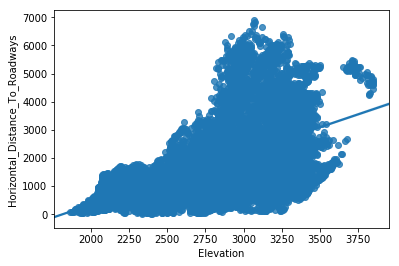

In [218]:
sns.regplot(x="Elevation",y="Horizontal_Distance_To_Roadways",data=check)

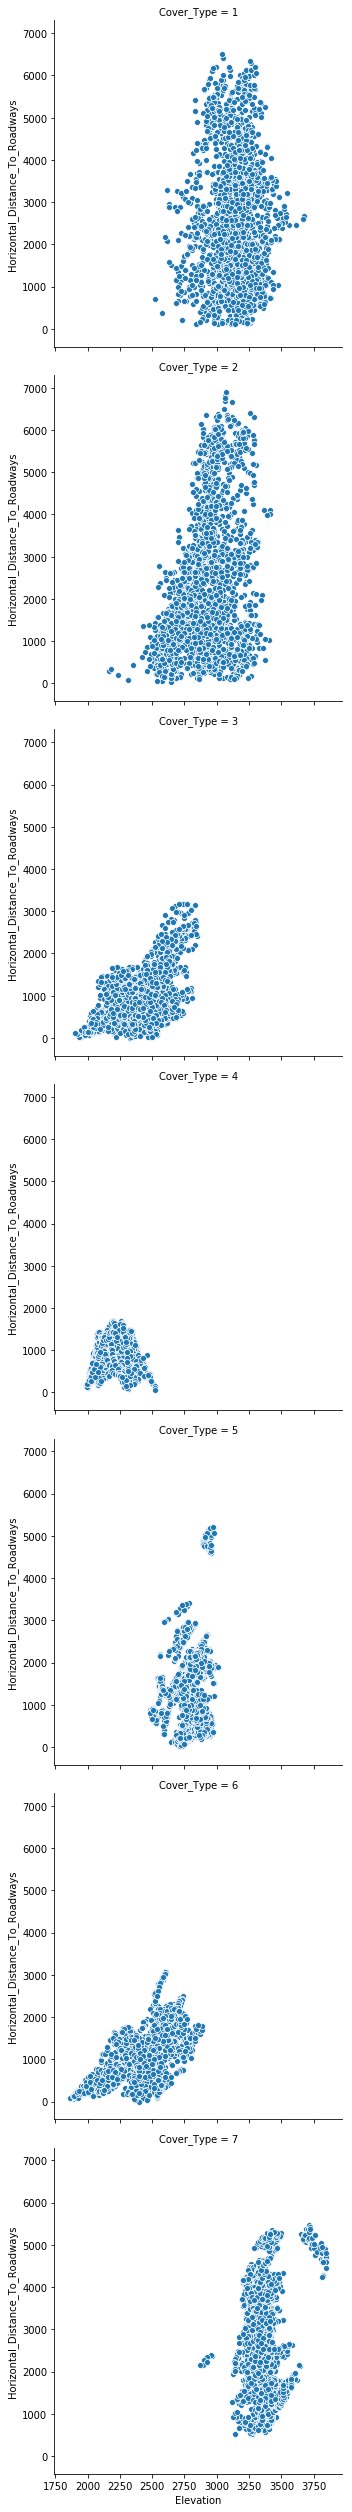

In [219]:
sns.relplot(x="Elevation",y="Horizontal_Distance_To_Roadways",data=check,row="Cover_Type",kind='scatter')

#### 2.C.ii) For Aspect, Hillshade_3pm is the highly correlated feature with correlation at 0.635022

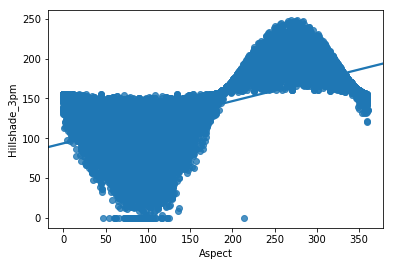

In [220]:
sns.regplot(x="Aspect",y="Hillshade_3pm",data=check)

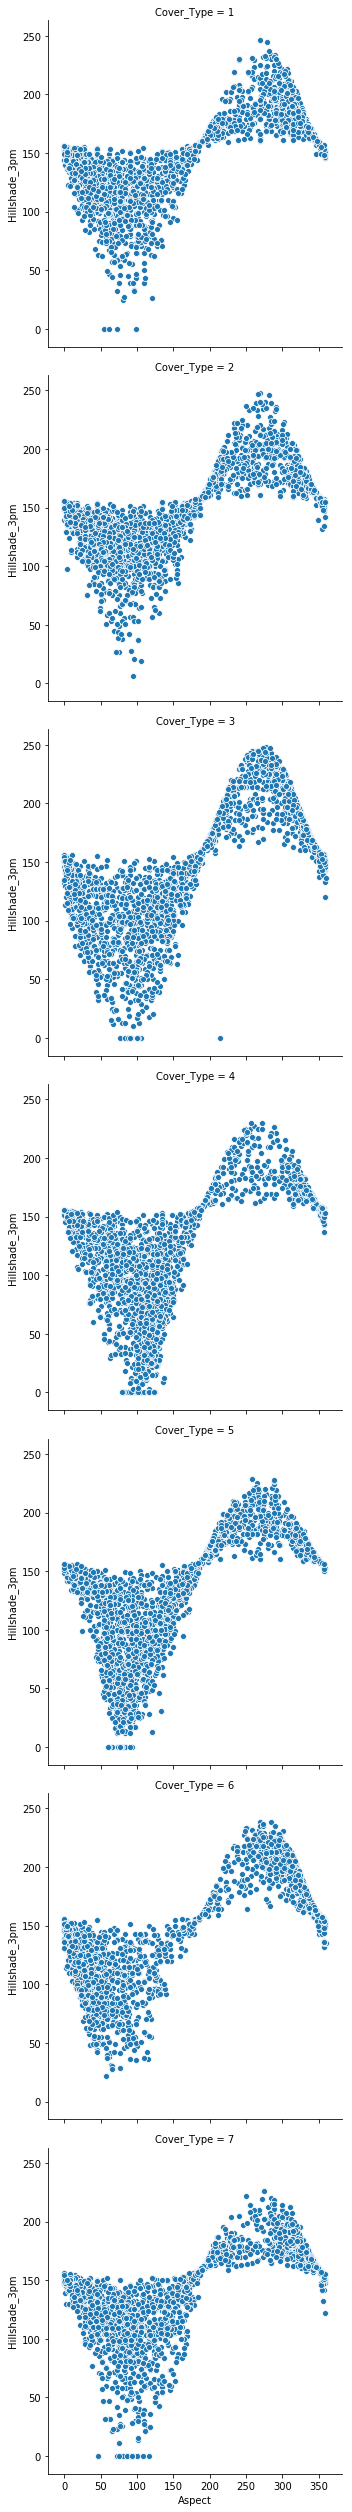

In [221]:
sns.relplot(x="Aspect",y="Hillshade_3pm",data=check,row="Cover_Type",kind='scatter')

#### 2.C.iii) For Slope, Hillshade_noon is the highly correlated feature with correlation at 0.612613

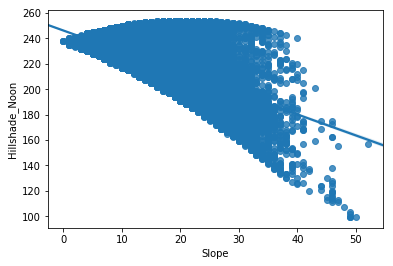

In [222]:
sns.regplot(x='Slope',y='Hillshade_Noon',data=check)

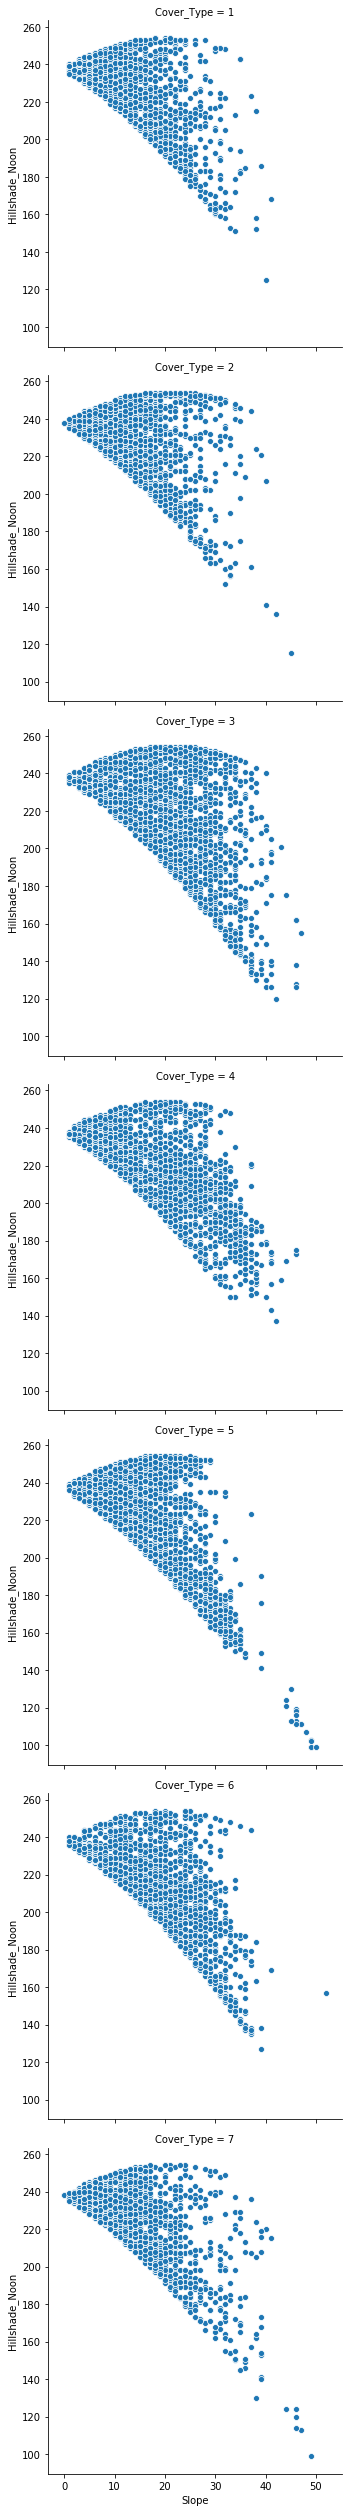

In [223]:
sns.relplot(x='Slope',y='Hillshade_Noon',data=check,row='Cover_Type')

#### 2.C.v) For Horizontal_Distance_To_Hydrology, Vertical_Distance_To_Hydrology is the highly correlated feature with correlation at 0.652142

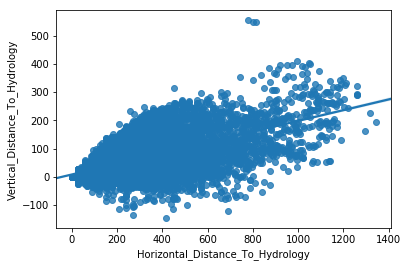

In [224]:
sns.regplot(x='Horizontal_Distance_To_Hydrology',y='Vertical_Distance_To_Hydrology',data=check)

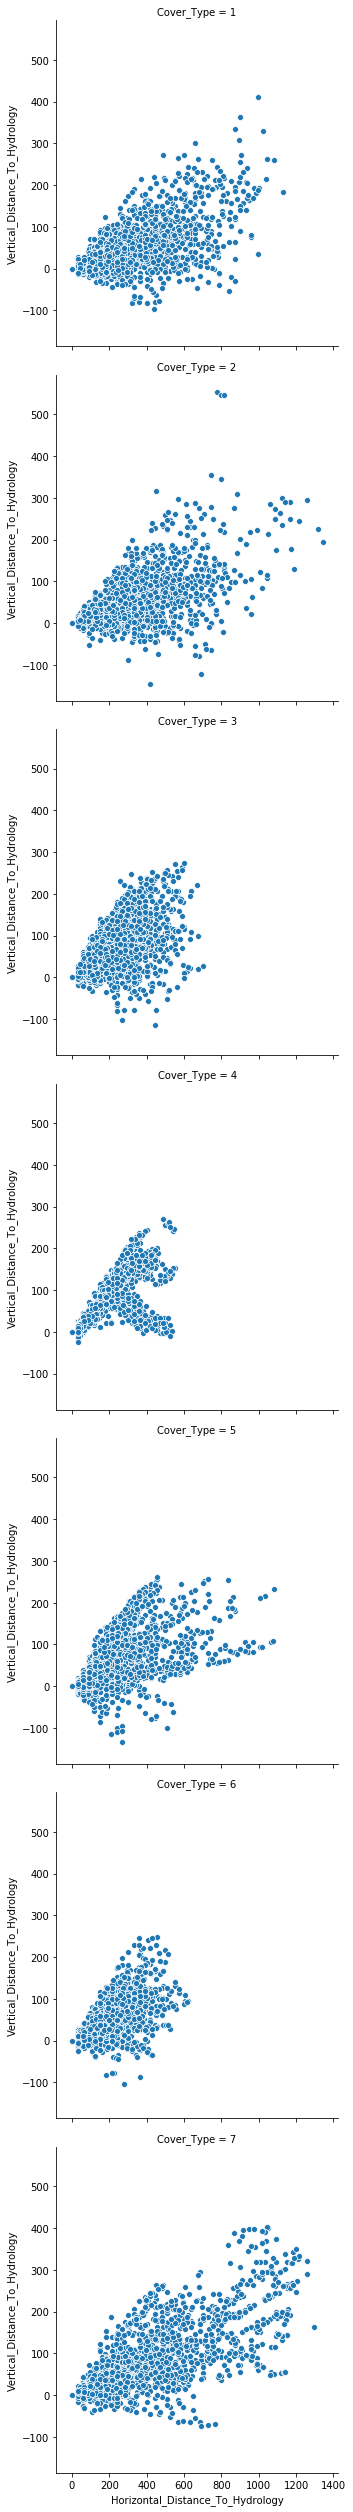

In [225]:
sns.relplot(x='Horizontal_Distance_To_Hydrology',y='Vertical_Distance_To_Hydrology',data=check,row='Cover_Type')

2.C.vi) For Vertical_Distance_To_Hyrdology, Vertical_Distance_To_Hydrology is the highly correlated features (v)

2.C.vi) For Horizontal_Distance_To_Roadways, Elevation is the highly correlated feature with correlation (i)

#### 2.C.vii) For Hillshade_9am,Hillshade_3pm is the highly correlated feature with correlation at 0.779965

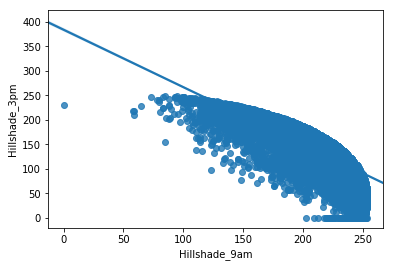

In [226]:
sns.regplot(x='Hillshade_9am',y='Hillshade_3pm',data=check)

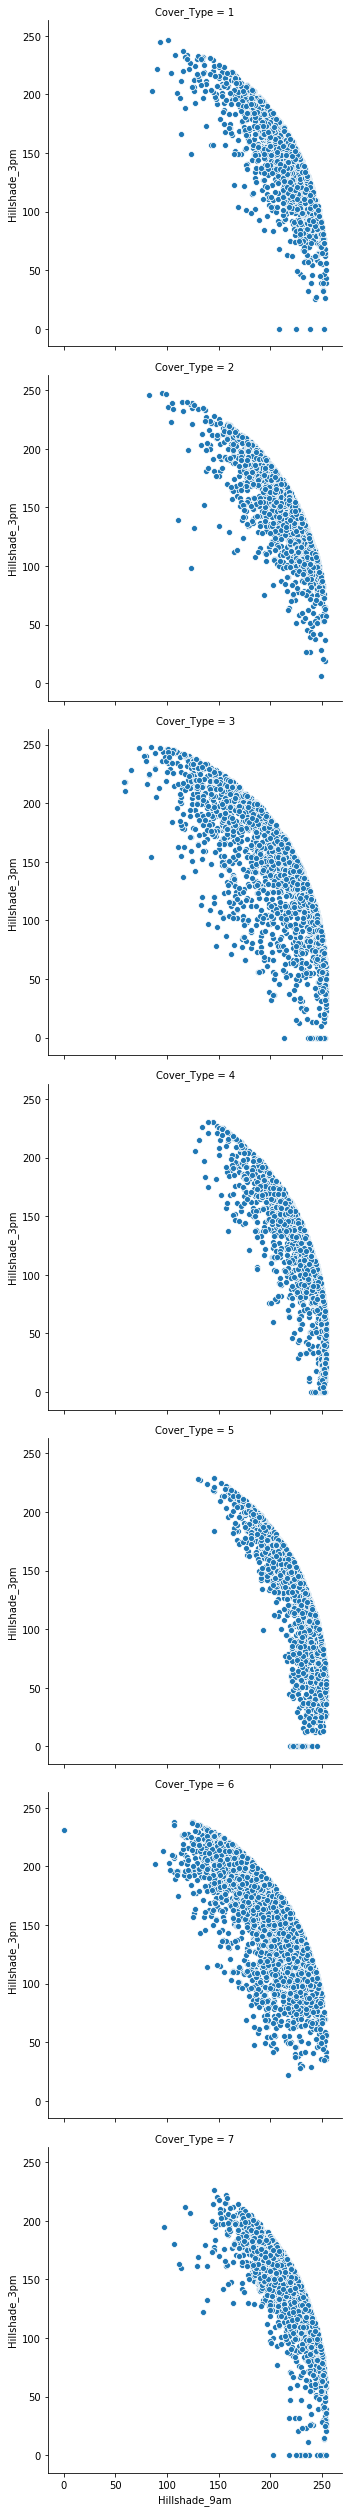

In [227]:
sns.relplot(x='Hillshade_9am',y='Hillshade_3pm', data=check,kind='scatter',row='Cover_Type')

2.C.viii) For Hillshade_Noon, Elevation is the highly correlated feature with correlation at 0.578 (i)

2.C.ix) For Hillshade_3pm, Hillshade_Noon is the highly correlated feature with correlation at 0.7799647 (vii)

#### 2.C.x) For Horizontal_Distance_To_Fire_Points, Hillshade_9am is the highly correlated feature with correlation at 0.486385

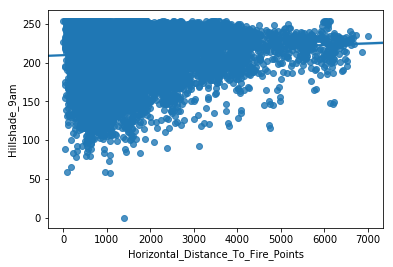

In [228]:
sns.regplot(x='Horizontal_Distance_To_Fire_Points',y='Hillshade_9am',data=check)

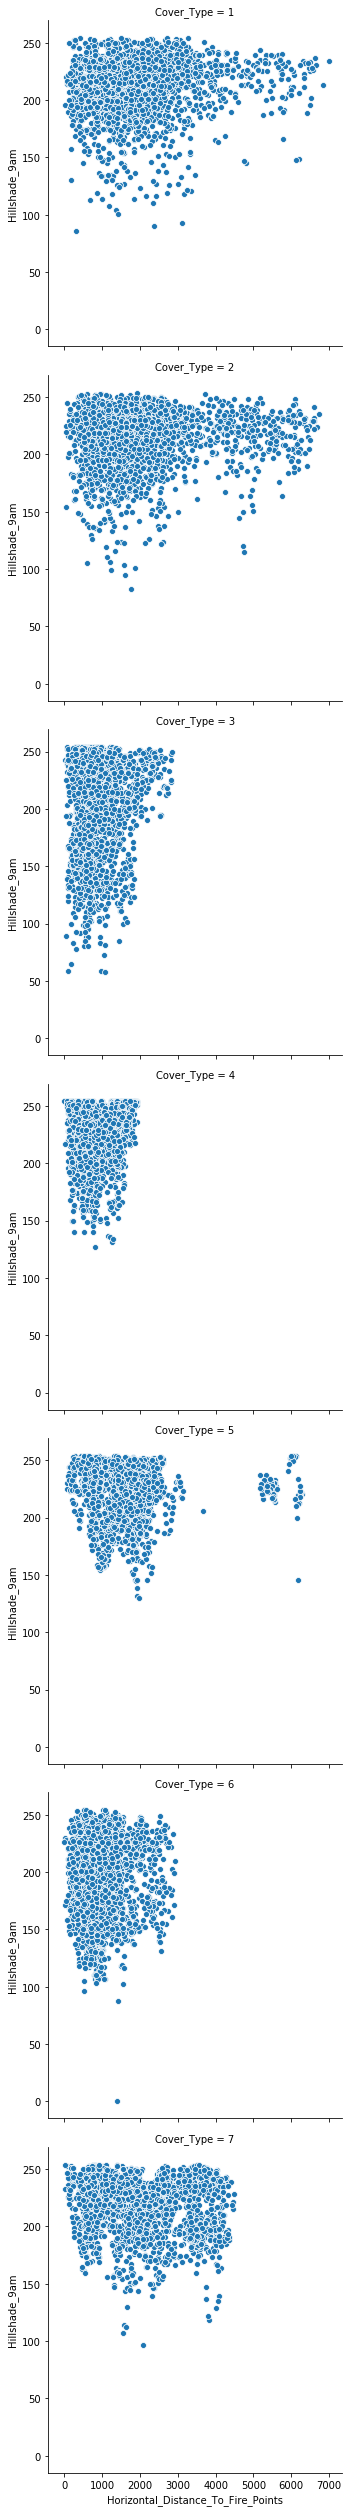

In [229]:
sns.relplot(x='Horizontal_Distance_To_Fire_Points',y='Hillshade_9am',data=check,row='Cover_Type')

### 3. Categorical v/s Numerical Features

#### 3.A. Cover Type v/s Numerical Features (for different Wilderness_Areas) Boxplot

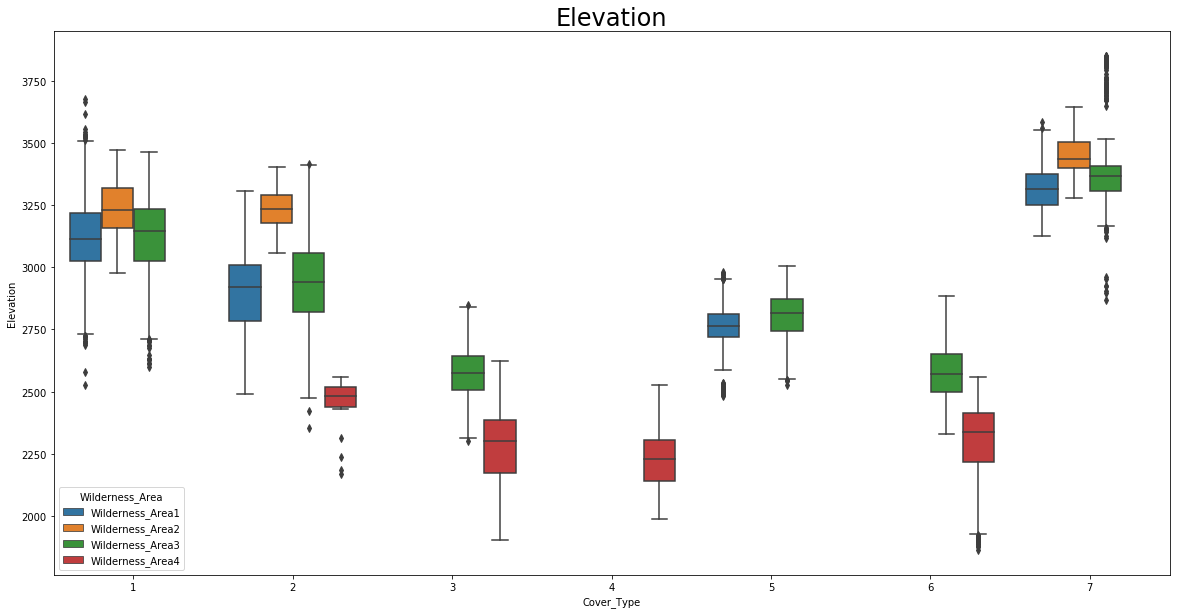

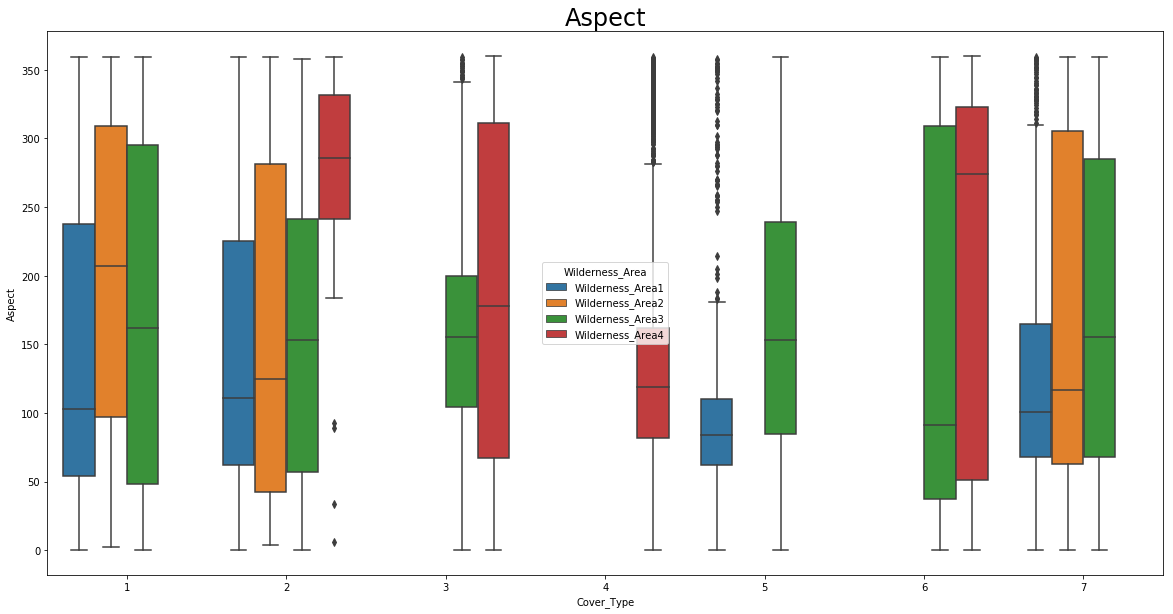

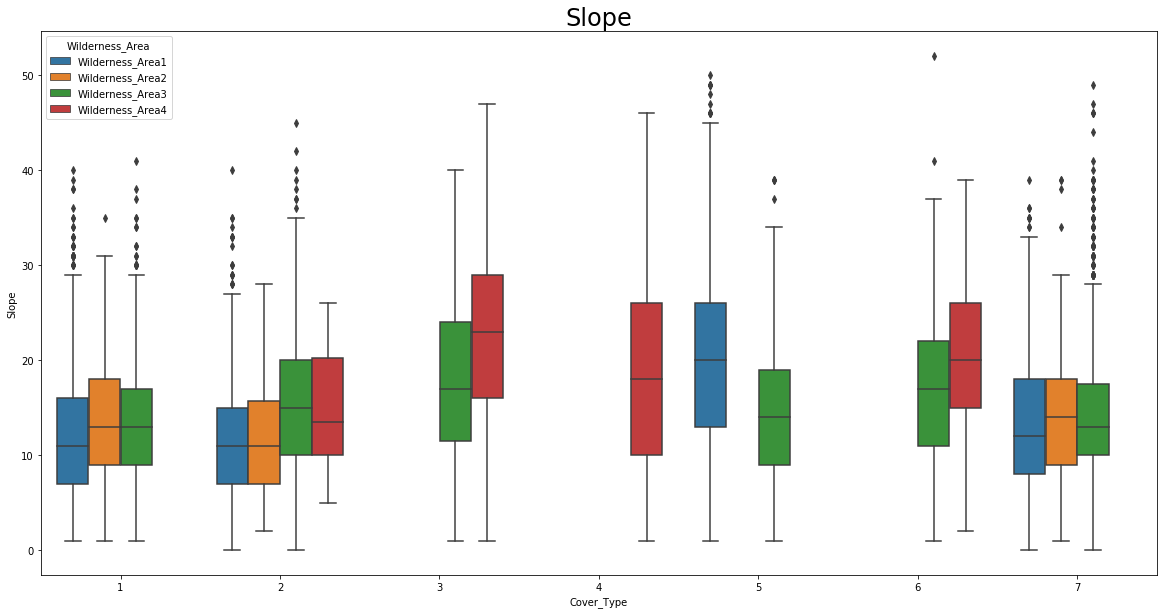

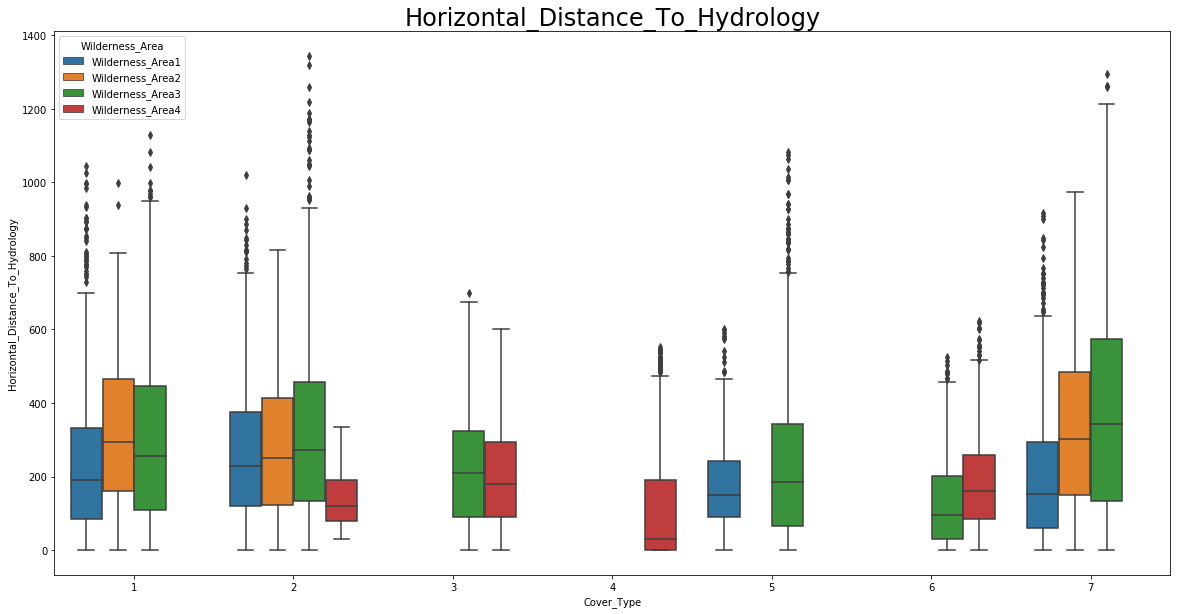

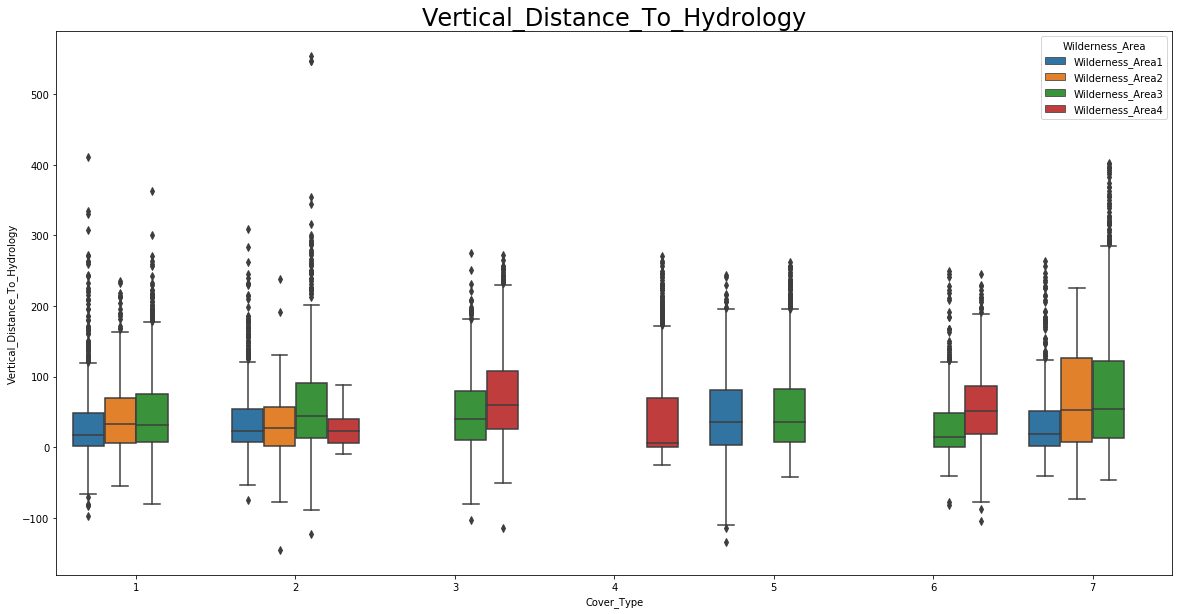

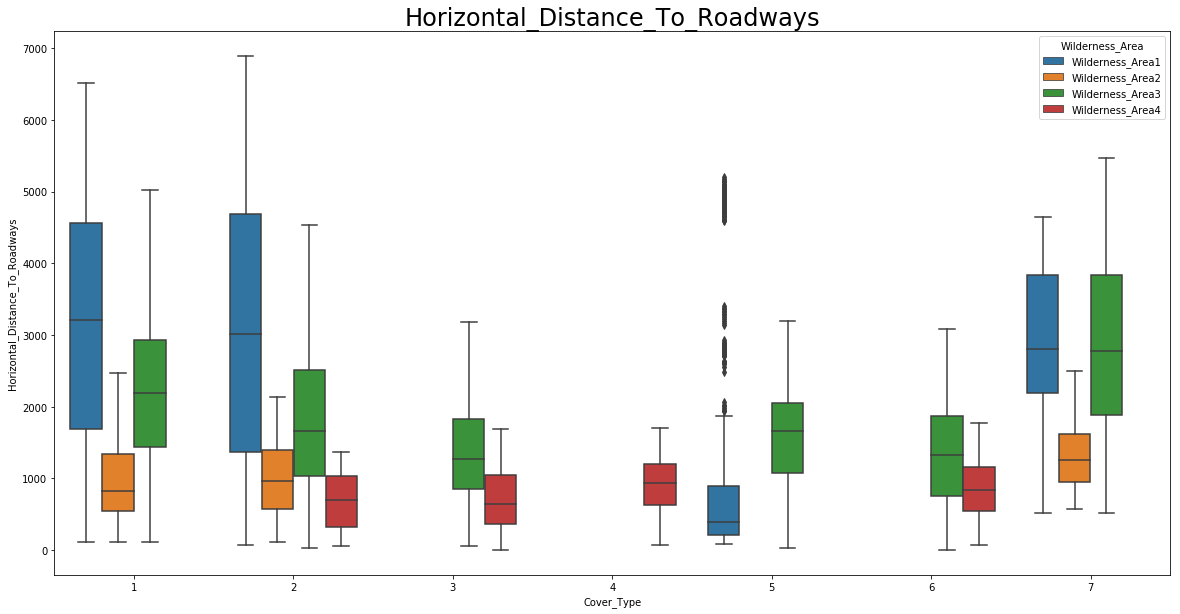

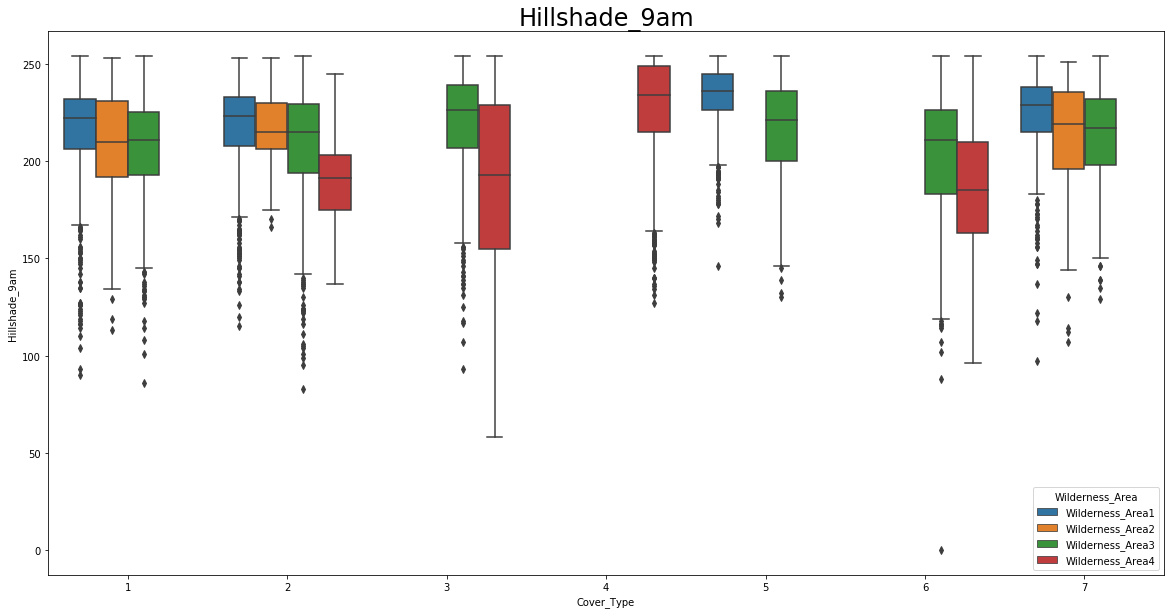

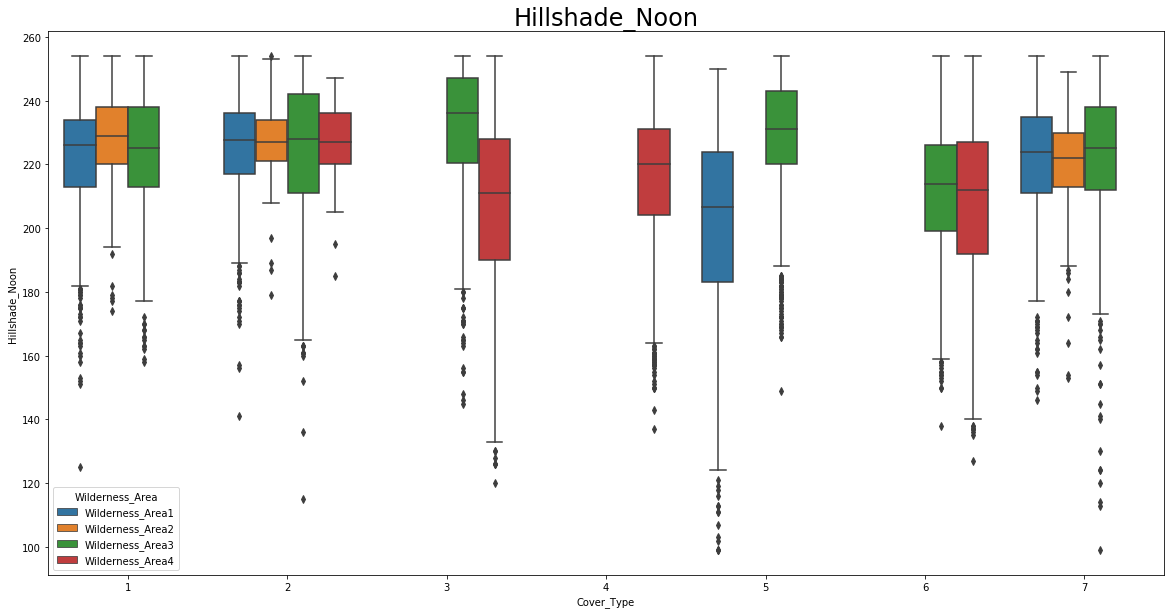

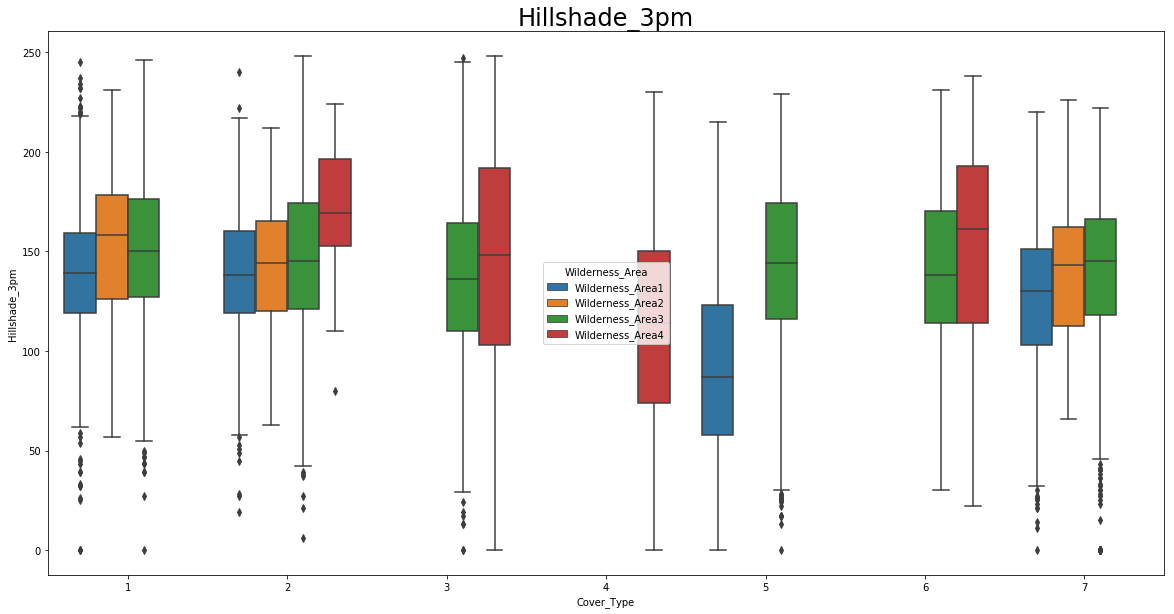

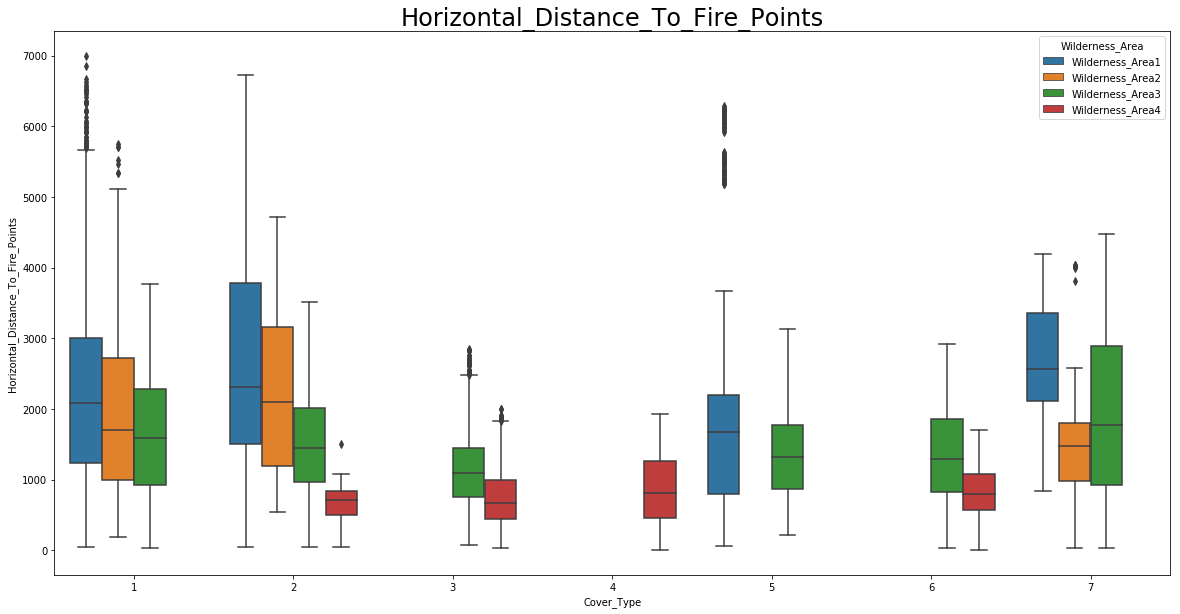

In [230]:
for col in list_contfeatures:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    g=sns.boxplot(ax=ax1,x='Cover_Type',y=col,data=check,hue='Wilderness_Area',hue_order=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])
    ax1.set_title(col,fontsize=24)
    plt.show()

#### 3.B. Cover Type v/s Numerical Features (for different Wilderness_Areas) Swarmplot

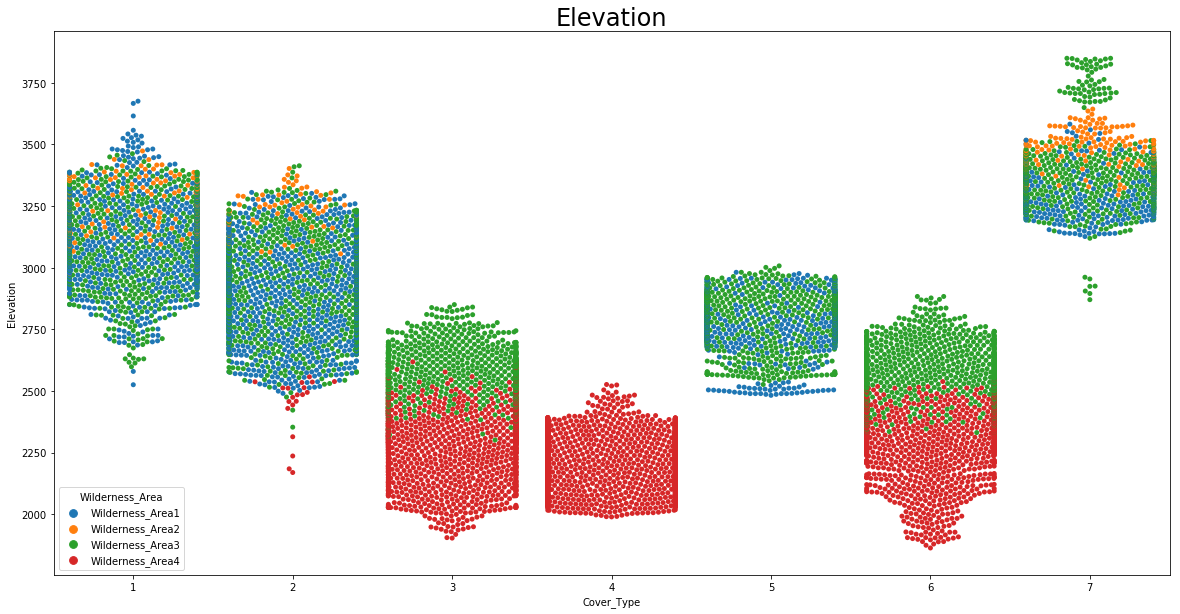

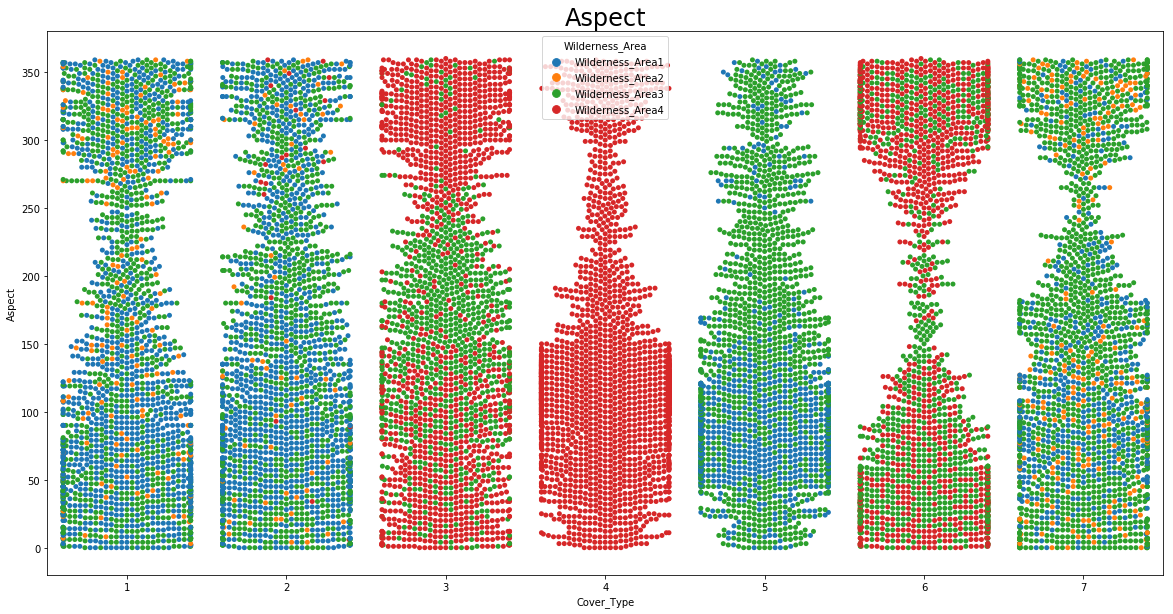

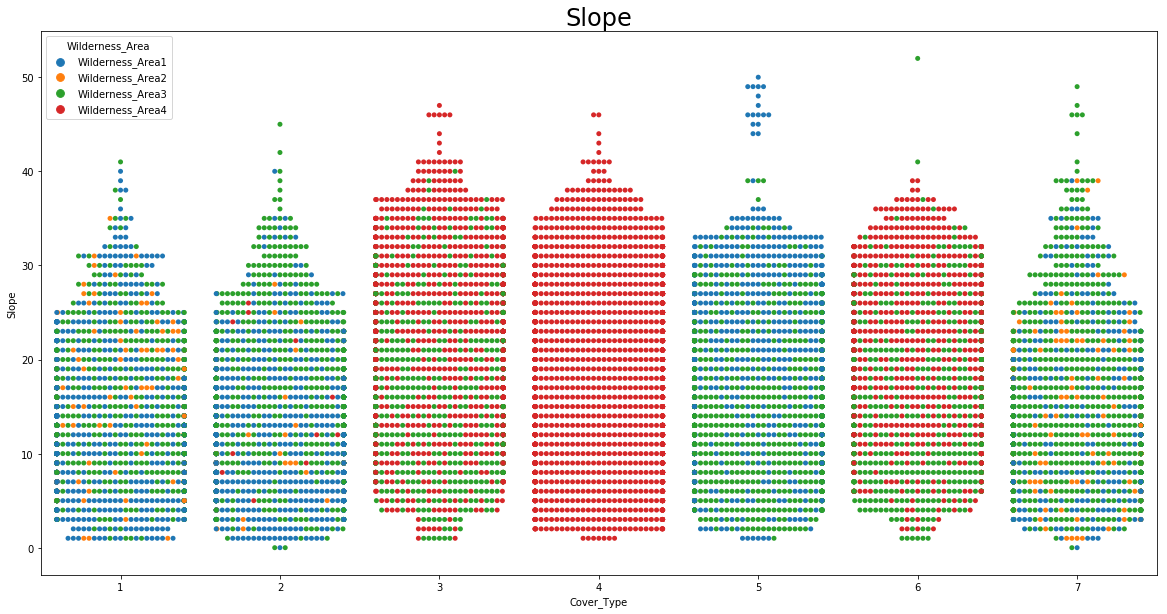

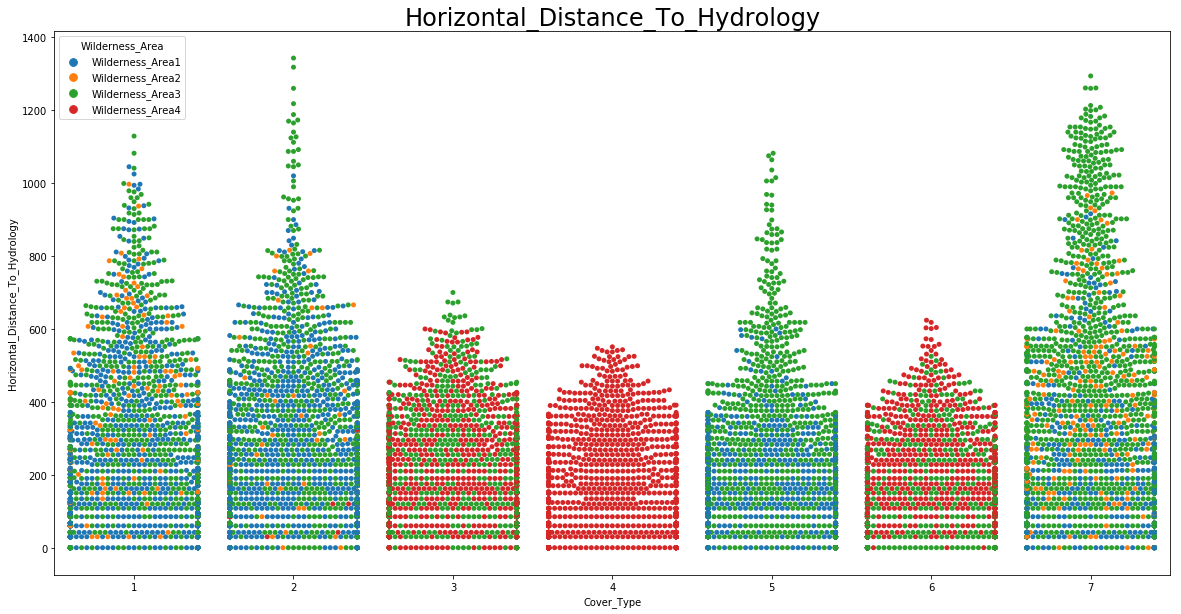

KeyboardInterrupt: 

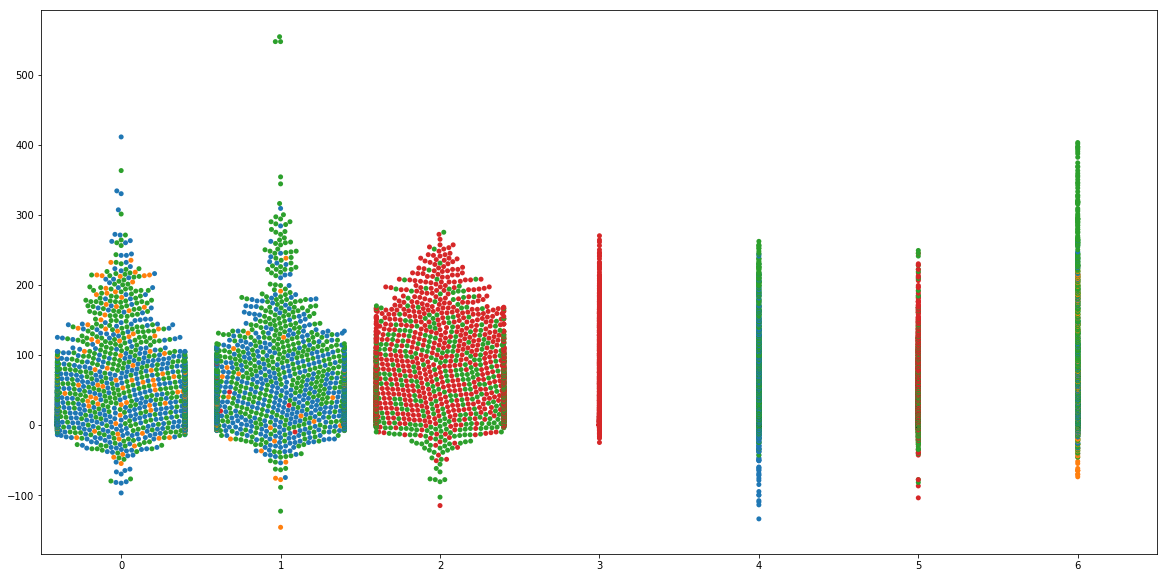

In [232]:
for col in list_contfeatures:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    g=sns.swarmplot(ax=ax1,x='Cover_Type',y=col,data=check,hue='Wilderness_Area',hue_order=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])
    ax1.set_title(col,fontsize=24)
    plt.show()

#### 3.C. Cover Type v/s Numerical Features to understand distribution for different Wilderness_Areas (ViolinPlot)

In [ ]:
for col in list_contfeatures:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    g=sns.violinplot(ax=ax1,x='Cover_Type',y=col,data=check,hue='Wilderness_Area',hue_order=['Wilderness_Area1','Wilderness_Area2','Wilderness_Area3','Wilderness_Area4'])
    ax1.set_title(col,fontsize=24)
    plt.show()

In [ ]:
for col in list_contfeatures:
    fig1,ax1 = plt.subplots(figsize=(20,10))
    g=sns.boxplot(ax=ax1,x='Wilderness_Area',y=col,data=check,hue='Cover_Type',hue_order=['1','2','3','4','5','6','7'])
    ax1.set_title(col,fontsize=24)
    plt.show()

Checking whether 1 Wilderness Area can have multiple Cover Types

In [ ]:
check.groupby(['Wilderness_Area','Cover_Type']).size()

#### Yes, 1 wilderness area can have multiple Cover Types

In [ ]:
check.groupby(['Wilderness_Area','Soil_Type']).size()

#### Yes, 1 wilderness area can have multiple Soil Types

In [ ]:
check_test.shape

#### Lets also try analyzing wilderness areas

In [ ]:
wilderness_area1_dataset = pd.concat([check.loc[check['Wilderness_Area']=="Wilderness_Area1",check.columns!='Cover_Type'],check_test.loc[check_test['Wilderness_Area']=="Wilderness_Area1"]],axis=0)

In [ ]:
wilderness_area1_dataset.describe()

In [ ]:
wilderness_area2_dataset = pd.concat([check.loc[check['Wilderness_Area']=="Wilderness_Area2",check.columns!='Cover_Type'],check_test.loc[check_test['Wilderness_Area']=="Wilderness_Area2"]],axis=0)

In [ ]:
wilderness_area2_dataset.describe()

In [ ]:
wilderness_area3_dataset = pd.concat([check.loc[check['Wilderness_Area']=="Wilderness_Area3",check.columns!='Cover_Type'],check_test.loc[check_test['Wilderness_Area']=="Wilderness_Area3"]],axis=0)

In [ ]:
wilderness_area3_dataset.describe()

In [ ]:
wilderness_area4_dataset = pd.concat([check.loc[check['Wilderness_Area']=="Wilderness_Area4",check.columns!='Cover_Type'],check_test.loc[check_test['Wilderness_Area']=="Wilderness_Area4"]],axis=0)

In [ ]:
wilderness_area4_dataset.describe()

#### D. Generate ideas for feature engineering and formulating any possible hypothesis 
We visualized different features, their distribution and dependencies with one another and target variable, which helped uncover many patterns such as elevation distribution for cover type 7 is on the higher side and so on
We found strong correlations (only taking magnitude) between features such as:
1. Hillshade @ 9 am and Hillshade @ 3pm 
2. Horizontal Distance to Hydrology & Vertical Distance Hydrology
....

While building models, we can use these insights. With a baseline model ready, we keep on piling these and see whether there is any improvement
Plus we will be using feature importance from RF, PCA to further drill down feature importance.

### Next up is start building models

### Before that, lets look t-sne

In [234]:
from sklearn.manifold import TSNE

In [235]:
tsne_model = TSNE(learning_rate=50)

In [239]:
df_numeric = check.loc[:,list_contfeatures]

In [251]:
#tsne_features = tsne_model.fit_transform(df_numeric)
#tsne_output = pd.DataFrame({'tsne_x':tsne_features[:,0],'tsne_y':tsne_features[:,1]})
#tsne_output.to_csv("E://Jupyter//Kaggle//3.learn-together//output files//tsne_output.csv")

In [252]:
tsne_features=pd.read_csv("E://Jupyter//Kaggle//3.learn-together//output files//tsne_output.csv")

In [253]:
tsne_features.columns

Index(['Unnamed: 0', 'tsne_x', 'tsne_y'], dtype='object')

In [254]:
df_tsne = check.copy()

In [255]:
df_tsne['x'] = tsne_features.loc[:,'tsne_x']
df_tsne['y'] = tsne_features.loc[:,'tsne_y']

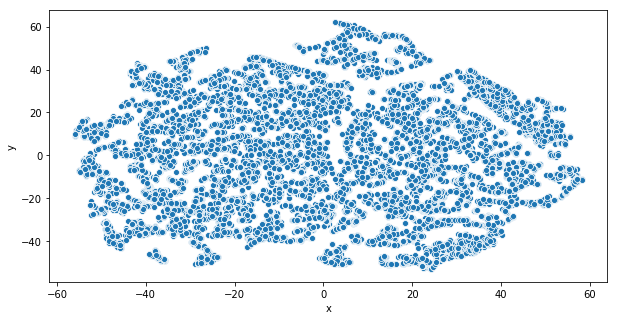

In [266]:
fig,ax = plt.subplots()
sns.scatterplot(x='x',y='y',data=df_tsne,ax=ax)
fig.set_size_inches([10,5])
plt.show()

In [277]:
df_tsne['Cover_Type_string']="Cover_Type"+df_tsne['Cover_Type']

In [278]:
df_tsne[['Cover_Type','Cover_Type_string']].head(5)

Cover_Type Cover_Type_string
0          5       Cover_Type5
1          5       Cover_Type5
2          2       Cover_Type2
3          2       Cover_Type2
4          5       Cover_Type5

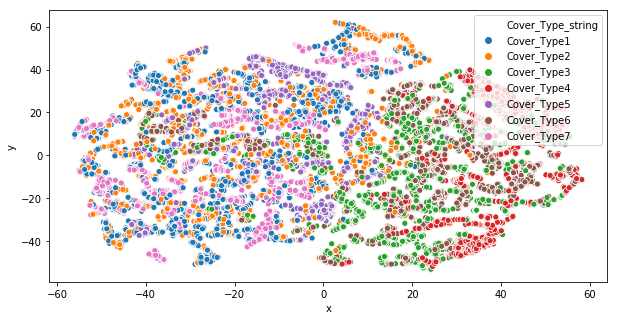

In [281]:
fig,ax = plt.subplots()
sns.scatterplot(x='x',y='y',data=df_tsne,ax=ax,hue='Cover_Type_string',hue_order=['Cover_Type1','Cover_Type2','Cover_Type3','Cover_Type4','Cover_Type5','Cover_Type6','Cover_Type7'])
fig.set_size_inches([10,5])
plt.show()

In [267]:
df_tsne.columns

Index(['Id', 'Elevation', 'Aspect', 'Slope',
       'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology',
       'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon',
       'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points',
       'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3',
       'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3',
       'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8',
       'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12',
       'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16',
       'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20',
       'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24',
       'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28',
       'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32',
       'Soil_Type33', 'Soil_Type34', 'Soil_Type35', 'Soil_Type36',
       'Soil_Type37', 'Soil_Type38', 'Soil_Type39', 'Soil_

### Principal Component Analysis (PCA)

In [282]:
from sklearn.preprocessing import StandardScaler

In [283]:
scaler = StandardScaler()

In [286]:
df_numeric_std = pd.DataFrame(scaler.fit_transform(df_numeric),columns=df_numeric.columns)

C:\Users\sscaria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sscaria\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [289]:
df_numeric_std.head()

Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
0  -0.367095 -0.959980 -1.597132                          0.146639   
1  -0.381461 -0.914559 -1.715424                         -0.072337   
2   0.130912 -0.160577 -0.887379                          0.194243   
3   0.085421 -0.015231  0.177250                          0.070474   
4  -0.369489 -1.014485 -1.715424                         -0.353198   

   Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                       -0.834074                        -0.908681   
1                       -0.932054                        -0.999246   
2                        0.227369                         1.106379   
3                        1.092853                         1.038455   
4                       -0.850404                        -0.998491   

   Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
0       0.271454        0.571653       0.281259   
1       0.238732        0.703225       0.346627   
2       0.696843        0.834797      -0.002005   
3       0.827731        0.834797      -0.285268   
4       0.238732        0.659368       0.324838   

   Horizontal_Distance_To_Fire_Points  
0                            4.334805  
1                            4.285710  
2                            4.191156  
3                            4.272981  
4                            4.237524

In [306]:
from sklearn.decomposition import PCA

In [321]:
pca = PCA(n_components=0.9,random_state=42)

In [322]:
pca.fit(df_numeric_std)

PCA(copy=True, iterated_power='auto', n_components=0.9, random_state=42,
  svd_solver='auto', tol=0.0, whiten=False)

In [323]:
pc = pca.transform(df_numeric_std)

In [326]:
pc.shape[1]

6

In [320]:
pca.explained_variance_ratio_.sum()

0.5145714496190166

In [311]:
df_numeric.columns

Index(['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
       'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
       'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
       'Horizontal_Distance_To_Fire_Points'],
      dtype='object')

In [312]:
pc.shape

(15120, 6)

In [305]:
df_numeric.shape

(15120, 10)

In [332]:
df_numeric['Elevation'].describe()

count    15120.000000
mean      2749.322553
std        417.678187
min       1863.000000
25%       2376.000000
50%       2752.000000
75%       3104.000000
max       3849.000000
Name: Elevation, dtype: float64

In [333]:
df_numeric['Aspect'].describe()

count    15120.000000
mean       156.676653
std        110.085801
min          0.000000
25%         65.000000
50%        126.000000
75%        261.000000
max        360.000000
Name: Aspect, dtype: float64

In [331]:
df_numeric['Slope'].describe()

count    15120.000000
mean        16.501587
std          8.453927
min          0.000000
25%         10.000000
50%         15.000000
75%         22.000000
max         52.000000
Name: Slope, dtype: float64